# AE Reinforcement learning - Homework 3

## Acrobot

This classical control problem is heavily based on the already available acrobot example. The noticable differences between this implementation and the stock one is that the actions in this implementation is in the continuous space,a different reward function, some reorganisation to remove unnecessary functions, and the integrator from scipy replaces the hand coded RK45.

### Random Agent

In [1]:
import gym,sys
import acrobot
import numpy as np

env = gym.make('vedant_acrobot-v0')

act=np.array([-1.0,1.0])
def run_episode(env, parameters):
    action_list = []
    reward_list= []
    observation_list= []
    observation = env.reset()
    totalreward = 0
    for i in range(100):
        #env.render()
        action = act[np.random.randint(2)]
        observation, reward, done, info = env.step(action)
        totalreward += reward
        #action_list = np.append(action_list, (action))
        reward_list= np.append(reward_list, reward)
        #observation_list= np.append(observation_list, (observation))
        action_list.append(action)
        observation_list.append(observation)
    return totalreward, action_list, reward_list, observation_list
parameters = np.random.rand(4) * 2 - 1
reward, action_list, reward_list, observation_list = run_episode(env,parameters)
env.close()

[2018-09-27 02:37:30,969] Making new env: vedant_acrobot-v0


Note:running the cellabove should have opened a new window with a render of acrobot. Shown below are the plots for the reward function, actions chosen, and states observed.

In [2]:
print(reward)

-268.77120760674313


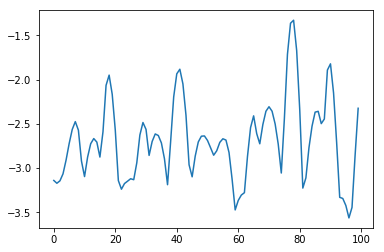

In [3]:
%matplotlib inline

from matplotlib.pyplot import plot

plot(np.array(reward_list));

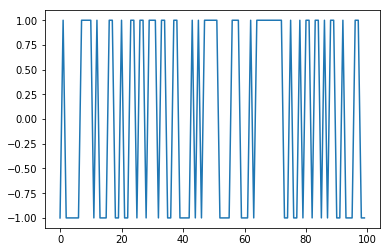

In [4]:
plot(np.array(action_list));

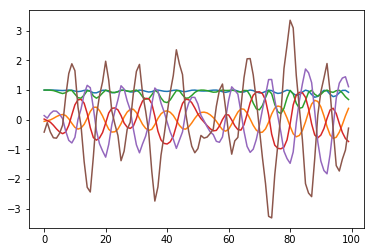

In [5]:
plot(np.array(observation_list));

### Deep Q learning Agent

In [6]:
import gym,sys
import acrobot

import Agents.DQN_Agent as DQNA

env = gym.make('vedant_acrobot-v0')


#Q, rewards = 
r = DQNA.DQN_Agent(env,BATCH_SIZE = 100,GAMMA = 0.9,TARGET_UPDATE = 50,initial_epsilon = 1, 
              final_epsilon = 0.1,total_episodes = 2000, annealing_period = None,max_steps = 50)



WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Complete


2000


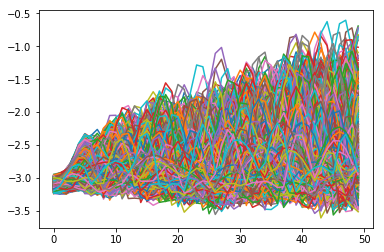

In [7]:
import numpy as np
%matplotlib inline

from matplotlib.pyplot import plot
from matplotlib.pyplot import figure

meanr = []
print(len(r))
for i in range(len(r)):
    r[i] = np.array(r[i])
    mean = np.mean(r[i])
    meanr.append(mean)
#print(r)
    #figure(i)
    plot(r[i])
    

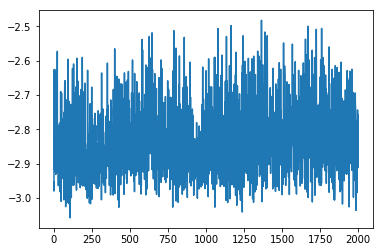

In [8]:
plot(meanr)

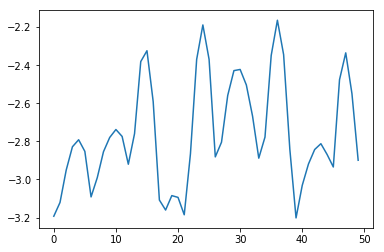

In [9]:
plot(r[-1])

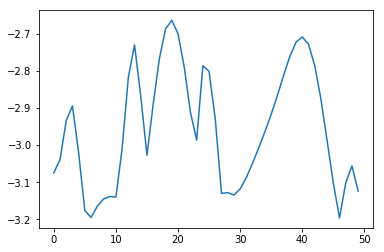

In [10]:
plot(r[0])